<a href="https://colab.research.google.com/github/Camty1/ENGS102_Final_Project/blob/main/ENGS102_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import math
from matplotlib import pyplot as plt

class Player:
    def __init__(self, move_prob=.5):
        self.move_prob = move_prob
        self.earnings = 0
        self.move_history = []
        self.earnings_history = []
        self.payout_history = []
        self.num_wins = 0
        self.rounds_played = 0

    # 0 is go to the bar, 1 is stay home
    def get_move(self, move_type=0):
        if move_type == 0:
            if random.random() <= self.move_prob:
                return 0
            else:
                return 1
        else:
            if self.rounds_played <= 10:
                if random.random() <= 0.5:
                    return 0
                else:
                    return 1
            else:
                if random.random() <= self.num_wins / self.rounds_played:
                    return 0
                else:
                    return 1

class Game:
    def __init__(self, minority_threshold=0.5, stay_home_payout=0, entry_fee=1, minority_payout=2, majority_payout=.5):
        self.player_list = []
        self.minority_threshold = minority_threshold
        self.stay_home_payout = stay_home_payout
        self.entry_fee = entry_fee
        self.minority_payout = minority_payout
        self.majority_payout = majority_payout
        self.num_players = 0
        self.num_players_per_round = []

    def calc_nash_probability(self, n=None):
        alpha = 0.5
        last_alpha = 0
        d_alpha = .0000001
        while abs(alpha - last_alpha) > .00001:
            last_alpha = alpha
            f = self._probability_function(alpha, n)
            f_prime = (self._probability_function(alpha + d_alpha, n) - f) / d_alpha

            alpha -= f / f_prime

        return alpha


    def _probability_function(self, alpha, n=None):
        if not n:
            n = self.num_players

        c = math.floor(self.minority_threshold * n)
        b = self.majority_payout - self.entry_fee
        g = self.minority_payout - self.entry_fee
        s = self.stay_home_payout

        alpha_value = 0
        for m in range(c):
            alpha_value += math.comb(n-1, m) * (alpha ** m) * ((1-alpha)**(n-1-m))

        constant_value = (s-b)/(g-b)

        return alpha_value - constant_value

    def add_player(self, player):
        self.player_list.append(player)
        self.num_players += 1

    def play_round(self, move_type=0):
        moves = []
        moves_count = [0,0]
        bar_visitors = []

        for i in range(self.num_players):
            move = self.player_list[i].get_move(move_type)
            moves.append(move)
            moves_count[move] += 1

            if move == 0:
                self.player_list[i].earnings -= self.entry_fee
                bar_visitors.append(i)
            else:
                self.player_list[i].earnings += self.stay_home_payout
                self.player_list[i].payout_history.append(self.stay_home_payout)
                self.player_list[i].earnings_history.append(self.player_list[i].earnings)
                self.player_list[i].move_history.append(moves[i])

        if moves_count[0] <= (self.minority_threshold * self.num_players):
            for i in bar_visitors:
                self.player_list[i].earnings += self.minority_payout
                self.player_list[i].num_wins += 1
                self.player_list[i].rounds_played += 1
                self.player_list[i].earnings_history.append(self.player_list[i].earnings)
                self.player_list[i].move_history.append(moves[i])
                self.player_list[i].payout_history.append(self.minority_payout - self.entry_fee)

        else:
            for i in bar_visitors:
                self.player_list[i].earnings += self.majority_payout
                self.player_list[i].rounds_played += 1
                self.player_list[i].earnings_history.append(self.player_list[i].earnings)
                self.player_list[i].move_history.append(moves[i])
                self.player_list[i].payout_history.append(self.majority_payout - self.entry_fee)

        self.num_players_per_round.append(len(bar_visitors))



In [ ]:
num_rounds = 100000
num_players = 3

game = Game(minority_threshold=(2/3))
p = game.calc_nash_probability(n=num_players)
print(p)
for i in range(num_players):
    game.add_player(Player(p))

for i in range(num_rounds):
    game.play_round(0)

print("Expected Payout w/ Nash Solution:", sum([sum(player.payout_history)/len(player.payout_history) for player in game.player_list])/num_players)

0.816496580927726
Expected Payout w/ Nash Solution: 5.333333333333326e-05


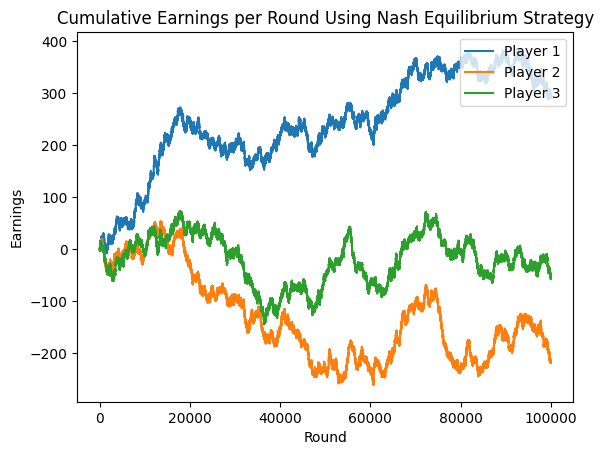

In [ ]:
fig1, ax1 = plt.subplots()
for count, player in enumerate(game.player_list):
    ax1.plot(player.earnings_history, label=("Player " + str(count + 1)))
ax1.set_title("Cumulative Earnings per Round Using Nash Equilibrium Strategy");
ax1.set_xlabel("Round");
ax1.set_ylabel("Earnings");
ax1.legend(loc="upper right");

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


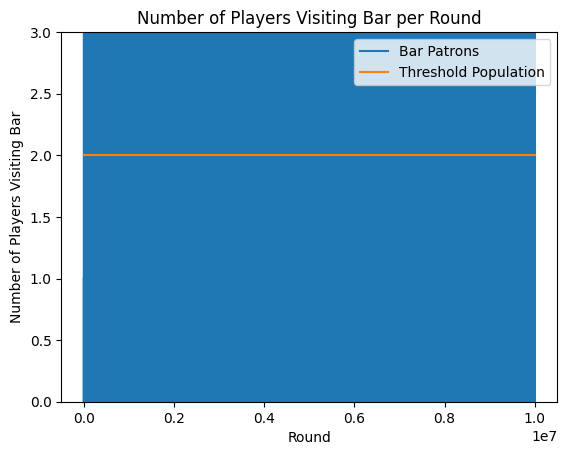

In [ ]:
fig2, ax2 = plt.subplots()
ax2.plot(game.num_players_per_round, label="Bar Patrons")
ax2.plot([0, num_rounds], [game.minority_threshold * num_players, game.minority_threshold * num_players], label="Threshold Population")
ax2.set_title("Number of Players Visiting Bar per Round");
ax2.set_xlabel("Round");
ax2.set_ylabel("Number of Players Visiting Bar");
ax2.set_ylim([0, num_players]);
ax2.legend();